In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df_oct = pd.read_csv("data/vumonic_india_food_delivery_20231001_20231031.csv", low_memory=False)
df_nov = pd.read_csv("data/vumonic_india_food_delivery_20231101_20231130.csv", low_memory=False)

# with open('data/vumonic_india_food_delivery_20231201_20231231.csv', 'r') as f:
#     first_line = f.readline()
# columns = first_line.replace('\n', '').split(',')
columns = df_nov.columns

df_dec = pd.read_csv('data/vumonic_india_food_delivery_20231201_20231231.csv', usecols=columns, encoding='latin-1', low_memory=False)

df = pd.concat([df_dec, df_nov, df_oct], ignore_index=True)
drop_columns = ['mid', 'year', 'day', 'order_promotion_discount', 
                'order_coupon_discount', 'order_seller_discount', 'order_delivery_discount',
                'order_status', 'order_delivery_discount', 'delivery_address_postal_code', 'order_payment_currency',
                'restaurant_address_postal_code', 'user_dob', 'user_address_postal_code', 'user_address_country']
df =  df.drop(drop_columns, axis=1)
df = df[df['user_age'] != 'male']

In [3]:
df

,transaction_id,company,sender_id,email_timestamp,month,product_name,product_price,product_quantity,product_total,order_subtotal,order_convenience_fee,order_packaging_fee,order_delivery_fee,order_tip,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid,order_discount_code,premium_membership,premium_membership_type,free_delivery,order_payment_type,delivery_address_city,delivery_address_state,restaurant_name,restaurant_address_city,restaurant_address_state,user_id,user_gender,user_age,user_address_city,user_address_state,user_device_brand,user_device_model,user_os_type,user_onboard_at,user_inactive_at
0,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01T00:08:24+00:00,12,Classic Chicken Roll,216.0,1.0,216.0,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,NaN,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN
1,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01T00:08:24+00:00,12,Multigrain Laccha Paratha Roll,NaN,NaN,NaN,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,Free,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN
2,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,Double Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
3,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,Crispy Potato Burger,89.0,1.0,89.0,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,NaN,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
4,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741079,9838db546bd880398bae5e8de6a68c3b,swiggy,noreply@swiggy.in,2023-10-26T19:23:37+00:00,10,Egg Curry 3 Eggs,200.0,1.0,200.0,330.0,3.0,20.0,9.0,NaN,13.35,NaN,124.99,NaN,250.0,SUPERSAVER,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741080,abfb444e117e7958b0b618ddcae44e39,swiggy,noreply@swiggy.in,2023-10-29T10:37:05+00:00,10,Chicken Fry Piece Biryani Half,250.0,1.0,250.0,250.0,3.0,NaN,9.0,NaN,8.35,NaN,125.00,NaN,145.0,SWIGGYWEEKENDS,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741081,084f0df866d7928acf1c8f332184dec9,swiggy,noreply@swiggy.in,2023-10-30T09:30:29+00:00,10,Chicken Fry Biryani,320.0,1.0,320.0,320.0,3.0,12.0,9.0,NaN,14.64,NaN,50.00,NaN,309.0,SWIGGYIT,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Royal Family Restaurant,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741082,ad320c16a2e04078f50af1416107bda2,swiggy,noreply@swiggy.in,2023-10-05T06:57:56+00:00,10,Veg Delight Pizza,109.0,3.0,327.0,327.0,NaN,NaN,NaN,NaN,10.79,NaN,40.00,NaN,

In [4]:
df.email_timestamp.apply(lambda x: x.split('+')[-1]).unique()

array(['00:00'], dtype=object)

In [5]:
df.email_timestamp[0]

'2023-12-01T00:08:24+00:00'

In [6]:
gg = df[['month', 'company', 'restaurant_address_state', 'transaction_id', 'order_amount_paid']].groupby(['month', 'company', 'transaction_id']).mean().reset_index()
gg

,month,company,transaction_id,order_amount_paid
0,10,swiggy,0001c3c7948eedd652082e309da91ab0,272.00
1,10,swiggy,0002954dcd473f48bd0a016959b0e7b7,461.00
2,10,swiggy,0002fc7946e4b867541ea854cf377e55,241.00
3,10,swiggy,0003478a60ccb71485fbda19d6e847f4,1135.00
4,10,swiggy,0003e05efca66fe7527d38443d8f17f6,300.00
...,...,...,...,...
394115,12,zomato,fffdadf023aa5cca949ba5633bf967e8,203.04
394116,12,zomato,fffe53ac6fc081c4e75390a4803ba7ff,249.11
394117,12,zomato,ffff547a8fefe08f8f7e9f89e509cf86,353.74
394118,12,zomato,ffffdef9f85107df8a43a75066103463,132.00


In [7]:
gg.groupby(['month', 'company']).mean().reset_index()

,month,company,order_amount_paid
0,10,swiggy,317.524373
1,10,zomato,345.423748
2,11,swiggy,332.913176
3,11,zomato,364.987162
4,12,swiggy,328.106855
5,12,zomato,360.130004


In [8]:
gg1 = gg.groupby(['month', 'company']).sum().reset_index().sort_values(['company', 'month']).reset_index()
gg1 = gg1.rename(columns={'order_amount_paid': 'sales'})
gg1['percentage_diff'] = 0.0
gg1.month = gg1.month.astype('str')

for i in range(1, len(gg1)):
    if gg1.iloc[i]['company'] == gg1.iloc[i - 1]['company']:
        diff = gg1.iloc[i]['sales'] / gg1.iloc[i - 1]['sales'] - 1
        gg1.at[gg1.index[i], 'percentage_diff'] = diff * 100


gg1

,index,month,company,sales,percentage_diff
0,0,10,swiggy,22244805.00,0.000000
1,2,11,swiggy,20939240.00,-5.869078
2,4,12,swiggy,20898438.00,-0.194859
3,1,10,zomato,23819385.37,0.000000
4,3,11,zomato,23405896.71,-1.735933
5,5,12,zomato,23186250.02,-0.938425


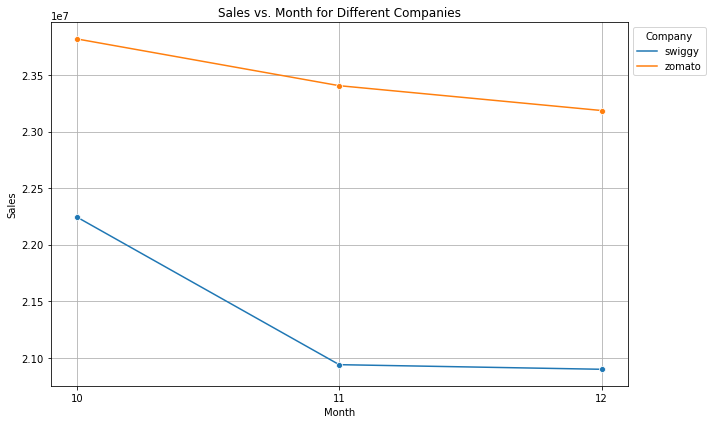

In [13]:
# Assuming 'month', 'company', and 'user_id' are columns in your DataFrame 'gga'
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='sales', hue='company', data=gg1, marker='o')
plt.title('Sales vs. Month for Different Companies')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

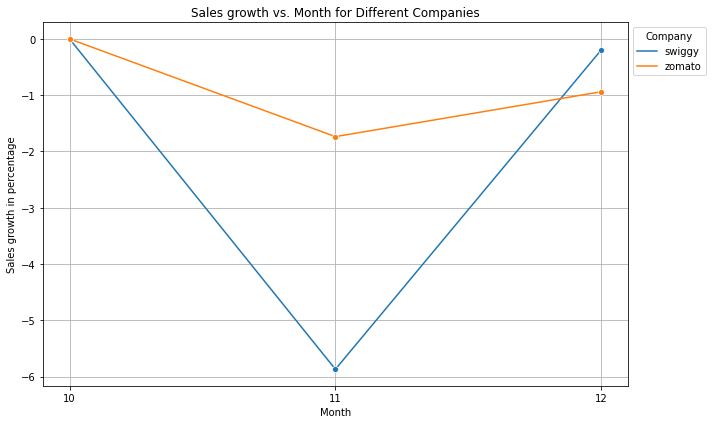

In [10]:
# Assuming 'month', 'company', and 'user_id' are columns in your DataFrame 'gga'
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='percentage_diff', hue='company', data=gg1, marker='o')
plt.title('Sales growth vs. Month for Different Companies')
plt.xlabel('Month')
plt.ylabel('Sales growth in percentage')
plt.grid(True)
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
gg1

,index,month,company,sales,percentage_diff
0,0,10,swiggy,22244805.00,0.000000
1,2,11,swiggy,20939240.00,-5.869078
2,4,12,swiggy,20898438.00,-0.194859
3,1,10,zomato,23819385.37,0.000000
4,3,11,zomato,23405896.71,-1.735933
5,5,12,zomato,23186250.02,-0.938425


In [15]:
(23186250.02-23819385.37)/23819385.37

-0.026580675368618946

In [16]:
(20898438.00-22244805.00)/22244805.00

-0.060525007973771854

In [11]:
gg2 = df[['month', 'company', 'restaurant_address_state', 'transaction_id', 'order_discount']].groupby(['month', 'company', 'transaction_id']).mean().reset_index().groupby(['month', 'company']).sum().reset_index()
gg2

,month,company,order_discount
0,10,swiggy,5412064.46
1,10,zomato,0.00
2,11,swiggy,4933931.39
3,11,zomato,0.00
4,12,swiggy,4982282.26
5,12,zomato,0.00


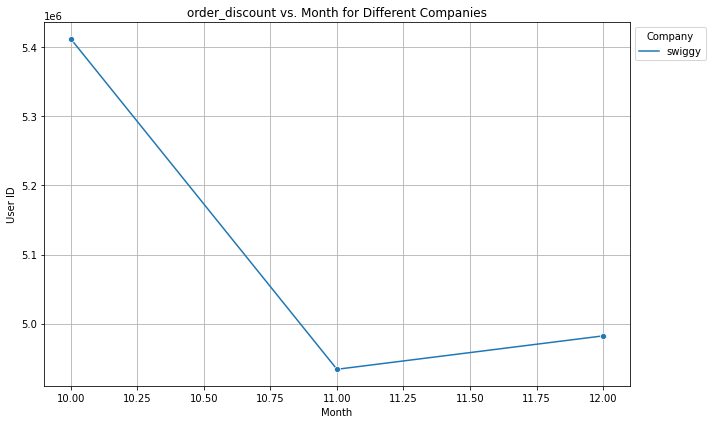

In [12]:
# Assuming 'month', 'company', and 'user_id' are columns in your DataFrame 'gga'
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='order_discount', hue='company', data=gg2[gg2.company == "swiggy"], marker='o')
plt.title('order_discount vs. Month for Different Companies')
plt.xlabel('Month')
plt.ylabel('User ID')
plt.grid(True)
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()